# Example of using varying template in snesim

In [1]:
import mpslib as mps
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

### Setup mps_snesim_tree

In [2]:
TI1, TI_filename1 = mps.trainingimages.strebelle(1, coarse3d=1)
O1=mps.mpslib(method='mps_snesim_tree')
O1.ti=TI1
O1.par['n_multiple_grids']=4;
O1.par['n_cond']=49
O1.par['n_real']=1
O1.par['rseed']=1
O1.par['debug_level']=-1
O1.par['simulation_grid_size'][0]=2*135
O1.par['simulation_grid_size'][1]=2*100

Loading ti_strebelle.dat


### Run mps_snesim_tree with different template sizes


In [3]:
r1 = 10 # template size in the coarse grid
r2 = [10,9,8,7,6,5,4,3] # template size in the finest grid

t=[]
R=[]
for ir in range(len(r2)):
    t0 = time.time()

    template = np.array([[r1, r2[ir]], [r1, r2[ir]], [1, 1]])
    O1.par['template_size']=template
    name = '%s_%d_%d'%(O1.method,r1,r2[ir])
    O1.parameter_filename= name+'.par'
    O1.mps_snesim_par_write()
    O1.run()
    R.append(O1.sim[0])
    #O1.plot_reals(9,1,name)

    t1 = time.time()
    t.append(t1 - t0)

eas: writing matrix to ti.dat 
eas: (nx,ny,nz)=(250,250,1) 
eas: title=250 250 1
mpslib: trying to run 'mps_snesim_tree'  in folder '/home/tmeha/RESEARCH/PROGRAMMING/MPSLIB/mps_snesim_tree'
mpslib: Using the following executable to run the model: /home/tmeha/RESEARCH/PROGRAMMING/MPSLIB/mps_snesim_tree
eas: writing data to ti.dat.gslib, ncolumns=1, ndata=54000.
eas: writing matrix to ti.dat 
eas: (nx,ny,nz)=(250,250,1) 
eas: title=250 250 1
mpslib: trying to run 'mps_snesim_tree'  in folder '/home/tmeha/RESEARCH/PROGRAMMING/MPSLIB/mps_snesim_tree'
mpslib: Using the following executable to run the model: /home/tmeha/RESEARCH/PROGRAMMING/MPSLIB/mps_snesim_tree
Grid 4/4
Using adaptive grid
Template Size INIT = 10,10,1
Template Size END  = 9,9,1
Template USE       = 10,10,1
Grid 3/4
Using adaptive grid
Template Size INIT = 10,10,1
Template Size END  = 9,9,1
Template USE       = 10,10,1
Grid 2/4
Using adaptive grid
Template Size INIT = 10,10,1
Template Size END  = 9,9,1
Template USE       = 

### Plot the results

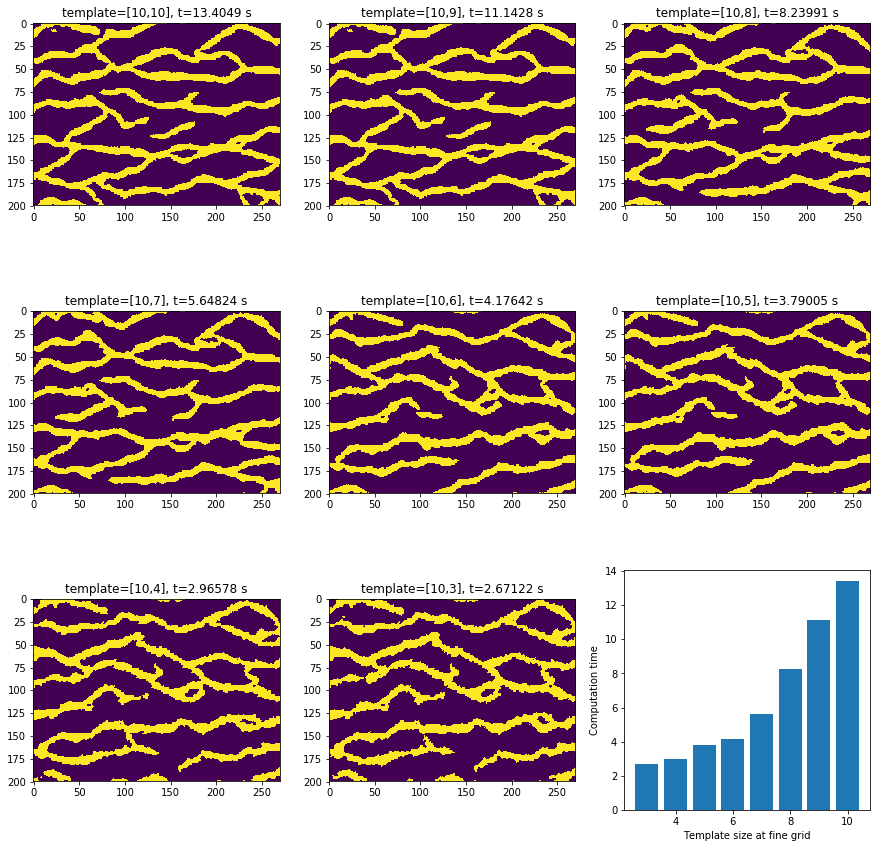

In [5]:
# Plot the realizations and a bar of the timing
fig = plt.figure(figsize=(15, 15))
outer = gridspec.GridSpec(3, 3, wspace=0.2, hspace=0.2)

for ir in range(len(r2)):
    ax1 = plt.Subplot(fig, outer[ir])
    fig.add_subplot(ax1)
    plt.imshow(R[ir])
    plt.title('template=[%d,%d], t=%g s'%(r1,r2[ir],t[ir]))

ax1 = plt.Subplot(fig, outer[-1])
fig.add_subplot(ax1)
plt.bar(r2,t)
plt.xlabel('Template size at fine grid')
plt.ylabel('Computation time (s)')
plt.show()
